In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 

In [2]:
data=pd.read_excel("CARGO_FOTP_DATASET.xlsx")

In [3]:
data.head()

,FLT_NO,ACT_CUS_FLE,FLEET,FLEET_FAM,FLEET_FAM_GRP,FLEET_BODY_TYP,FLT_TYP,LEG_DEP_AP,LEG_DEP_GMT_DT,LEG_DEP_GMT_TM,...,DELAY2_SUB_CODE,DELAY3_SUB_CODE,DELAY4_SUB_CODE,DELAY_ROOT_ARR_AP,DELAY_ROOT_DEP_AP,DELAY1_DURATION,DELAY2_DURATION,DELAY3_DURATION,DELAY4_DURATION,TOT_DELAY_DURATION
0,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,20210509,1205,...,NaN,NaN,NaN,?,?,0,0,0,0,0
1,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,20210512,1526,...,NaN,NaN,NaN,?,?,0,0,0,0,0
2,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,20210516,1209,...,NaN,NaN,NaN,?,?,0,0,0,0,0
3,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,20210519,1528,...,NaN,NaN,NaN,?,?,0,0,0,0,0
4,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,20210523,1205,...,NaN,NaN,NaN,?,?,0,0,0,0,0


GOAL : Delay Prediction for cargo flights, Metric : %95 


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99546 entries, 0 to 99545
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   FLT_NO               99546 non-null  object
 1   ACT_CUS_FLE          99546 non-null  object
 2   FLEET                99546 non-null  object
 3   FLEET_FAM            99546 non-null  object
 4   FLEET_FAM_GRP        99546 non-null  object
 5   FLEET_BODY_TYP       99546 non-null  object
 6   FLT_TYP              99546 non-null  object
 7   LEG_DEP_AP           99546 non-null  object
 8   LEG_DEP_GMT_DT       99546 non-null  int64 
 9   LEG_DEP_GMT_TM       99546 non-null  int64 
 10  LEG_DEP_CNTRY_COD    99512 non-null  object
 11  LEG_DEP_RGN_COD      95771 non-null  object
 12  LEG_ARR_AP           99546 non-null  object
 13  LEG_ARR_GMT_DT       99546 non-null  int64 
 14  LEG_ARR_GMT_TM       99546 non-null  int64 
 15  LEG_ARR_CNTRY_COD    99512 non-null  object
 16  LEG_

In [5]:
data.describe()

,LEG_DEP_GMT_DT,LEG_DEP_GMT_TM,LEG_ARR_GMT_DT,LEG_ARR_GMT_TM,DELAY1_DURATION,DELAY2_DURATION,DELAY3_DURATION,DELAY4_DURATION,TOT_DELAY_DURATION
count,9.954600e+04,99546.000000,9.954600e+04,99546.000000,99546.000000,99546.000000,99546.000000,99546.000000,99546.000000
mean,2.019249e+07,1201.375203,2.019250e+07,1208.110803,112.058486,12.377192,2.249915,0.353264,127.038856
std,1.289824e+04,668.607877,1.289884e+04,666.799934,277.712802,67.957361,24.556694,8.632271,297.532552
min,2.017010e+07,0.000000,2.017010e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.018083e+07,618.000000,2.018083e+07,646.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.019112e+07,1235.000000,2.019112e+07,1226.000000,14.000000,0.000000,0.000000,0.000000,20.000000
75%,2.020093e+07,1757.000000,2.020093e+07,1757.000000,94.000000,7.000000,0.000000,0.000000,116.000000
max,2.021063e+07,2359.000000,2.021070e+07,2359.000000,7596.000000,5362.000000,2880.000000,1159.000000,7596.000000


<AxesSubplot:>

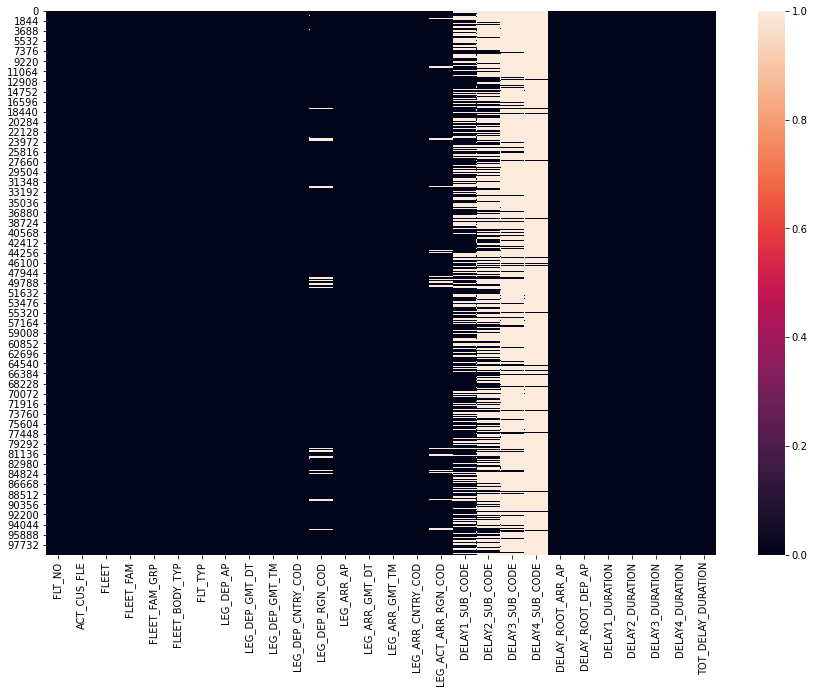

In [6]:
plt.figure(figsize=(15,10))
sns.heatmap(data.isnull())

HEDEF 
* Ayları mevsimsel olarak kodlama
* Saatleri gün dilimlerine bölme (06-12 sabah, öğle, akşam, gece )
* Hedef değişkenini oluşturma 
* Encoding 
* X_train, X_test 



In [7]:
data['DELAY'] = [1 if x>0 else 0 for x in data['TOT_DELAY_DURATION']]

In [8]:
data.head()

,FLT_NO,ACT_CUS_FLE,FLEET,FLEET_FAM,FLEET_FAM_GRP,FLEET_BODY_TYP,FLT_TYP,LEG_DEP_AP,LEG_DEP_GMT_DT,LEG_DEP_GMT_TM,...,DELAY3_SUB_CODE,DELAY4_SUB_CODE,DELAY_ROOT_ARR_AP,DELAY_ROOT_DEP_AP,DELAY1_DURATION,DELAY2_DURATION,DELAY3_DURATION,DELAY4_DURATION,TOT_DELAY_DURATION,DELAY
0,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,20210509,1205,...,NaN,NaN,?,?,0,0,0,0,0,0
1,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,20210512,1526,...,NaN,NaN,?,?,0,0,0,0,0,0
2,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,20210516,1209,...,NaN,NaN,?,?,0,0,0,0,0,0
3,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,20210519,1528,...,NaN,NaN,?,?,0,0,0,0,0,0
4,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,20210523,1205,...,NaN,NaN,?,?,0,0,0,0,0,0


In [9]:
data["LEG_DEP_GMT_DT"].dtype

dtype('int64')

In [10]:
data["LEG_ARR_GMT_DT"].dtype

dtype('int64')

In [11]:
data["LEG_DEP_GMT_DT"] = pd.to_datetime(data["LEG_DEP_GMT_DT"],format='%Y%m%d') 

In [12]:
data['LEG_DEP_GMT_DT'] = data['LEG_DEP_GMT_DT'].apply(lambda time: time.month)

In [13]:
data["LEG_ARR_GMT_DT"][0].dtype

dtype('int64')

In [14]:
data["LEG_ARR_GMT_DT"] = pd.to_datetime(data["LEG_ARR_GMT_DT"],format='%Y%m%d') 

In [15]:
data['LEG_ARR_GMT_DT'] = data['LEG_ARR_GMT_DT'].apply(lambda time: time.month)

In [16]:
data['LEG_ARR_GMT_DT'].dtype


dtype('int64')

In [18]:
data['LEG_ARR_GMT_DT']

0        5
1        5
2        5
3        5
4        5
        ..
99541    2
99542    3
99543    3
99544    3
99545    3
Name: LEG_ARR_GMT_DT, Length: 99546, dtype: int64